In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random




def shuffle_and_preserve(raw_list, N_max):
    items = list(set(raw_list))
    counts = {}
    
    for element in raw_list:
        try: counts[element] += 1/len(raw_list)
        except: counts[element] = 1/len(raw_list)
    
    final_list = []
    partial_sum = 0
    for s in items[:-1]:
        counts[s] = int(N_max*counts[s])
        partial_sum += counts[s]
        
    
    counts[items[-1]] = N_max - partial_sum
    
    for s in items:
        for i in range(counts[s]):
            final_list.append(s)

    
    return final_list
    

In [2]:
#First, let us create a 1D random walker, with step constant in time s = 1

In [3]:
#Now we want to see some things. Like doing M iterations, what is the mean value at each moment of time. What is the mean quadratic distance to origin, and so.

M = 1000
s = 1
n_steps = 4000

x = np.zeros((M,n_steps), dtype=int)

for j in range(M):
    displacements = np.random.randint(-1.0*s, s+1, n_steps-1)
    for i in range(1,n_steps):
        x[j][i] = x[j][i-1] + displacements[i-1]
    

Text(0.5, 0, 't')

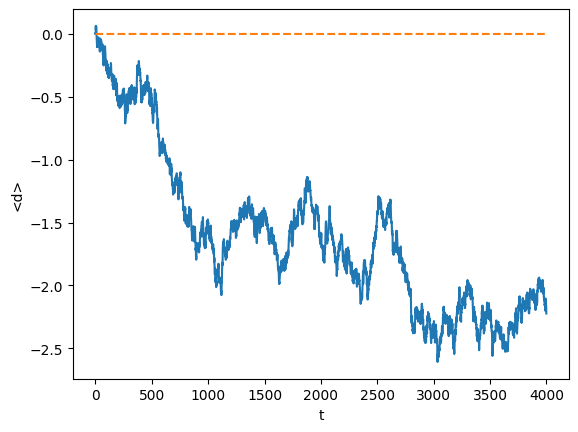

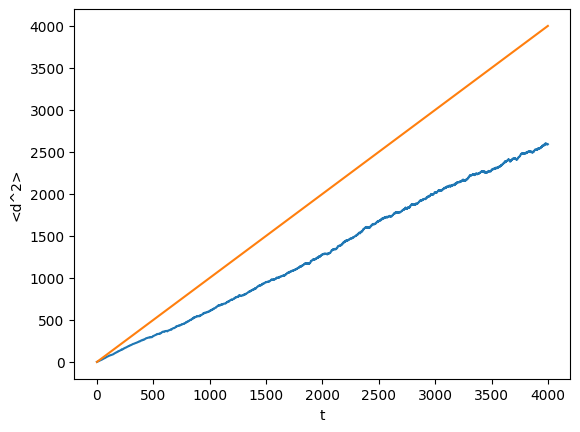

In [4]:
y = np.zeros((n_steps))
y_sq = np.zeros((n_steps))
for t in range(n_steps):
    y[t] = x[:,t].mean()
    y_sq[t] = (x[:,t]**2).mean()

    
x_axis = np.arange(n_steps)

plt.figure()
plt.plot(x_axis,y)
plt.plot(x_axis,np.zeros((n_steps)), '--')

plt.ylabel('<d>')
plt.xlabel('t')


plt.figure()
plt.plot(x_axis,y_sq)
plt.plot(x_axis,x_axis)

plt.ylabel('<d^2>')
plt.xlabel('t')



In [5]:
#Now, we want to see the full dependence with s and t of <d> and <d^2>

In [6]:
M = 1000
n_steps = 4000

max_s = 10
s_array = np.arange(1,max_s)

y = np.zeros((max_s-1))
y_sq = np.zeros((max_s-1))
    

for k,s in enumerate(s_array):
    

    x = np.zeros((M,n_steps), dtype=int)

    for j in range(M):
        displacements = np.random.randint(-1.0*s, s+1, n_steps-1)
        for i in range(1,n_steps):
            x[j][i] = x[j][i-1] + displacements[i-1]
    t = n_steps -1
    y[k] = x[:,t].mean()
    y_sq[k] = (x[:,t]**2).mean()
    

Text(0.5, 0, 's')

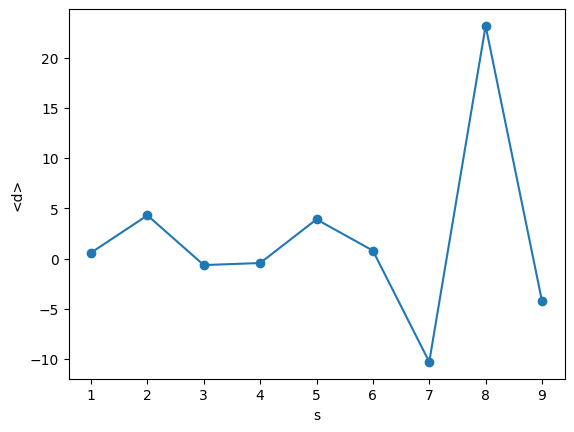

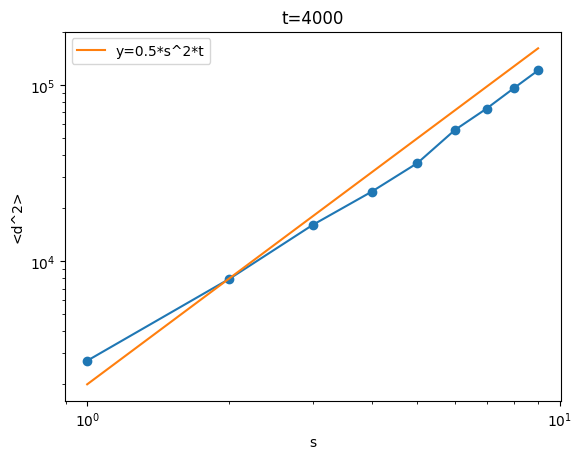

In [7]:
plt.figure()
plt.plot(s_array, y, 'o-')
plt.ylabel('<d>')
plt.xlabel('s')

plt.figure()
plt.plot(s_array, y_sq, 'o-')
plt.plot(s_array, 0.5*s_array*s_array*t, label=f'y=0.5*s^2*t')
plt.legend(loc='best')
plt.yscale('log')
plt.title(f't={n_steps}')
plt.xscale('log')
plt.ylabel('<d^2>')
plt.xlabel('s')

In [8]:
#Perfect so far, now we need to change paradigm.
#Need to create Class called walker, and the population of walkers is just a list.

In [3]:
class Position2D():
    def __init__(self, x,y):
        self.x = x
        self.y = y
        return None
    
    def __repr__(self):
        #print(self.x,self.y) 
        return f'x={self.x}, y={self.y}'
    def __add__(p1,p2):
        return Position2D(p1.x+p2.x, p1.y+p2.y)    


class Walker():
    def __init__(self, position):
        self.position = Position2D(position.x, position.y)

    
    def copy(self):
        p = Position2D(self.position.x, self.position.y)
        c = Walker(p)
        return c
    
    def __repr__(self):
        return f'Walker on position {self.position}'
    
    
def calculateParametersLSR(x, y):
	"""
	Function that calculates w* and b* for a least square regression and the standard error for b*
	Inputs:
		x: array containing the x-values in log-scale
		y: array containing the y-values in log-scale
	Outputs:
		b: float containing the intercept term of the regression line
		w: float containing the slope of the regression line
		SEw: float containing the standard error of b*
	"""

	meanTarget = np.mean(y)
	meanFeature = np.mean(x)

	centeredTarget = y - meanTarget
	centeredFeature = x - meanFeature

	w = (centeredFeature @ centeredTarget)/(centeredFeature @ centeredFeature)

	b = meanTarget - w *  meanFeature

	# Standard error
	yHat = b + w * x
	n = x.shape[0]

	SEw = np.sqrt((1/(n - 2)) * ((np.sum(np.power((y - yHat), 2)))/(np.sum(np.power((x - meanFeature), 2)))))



	return b, w, SEw

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '<d^2>')

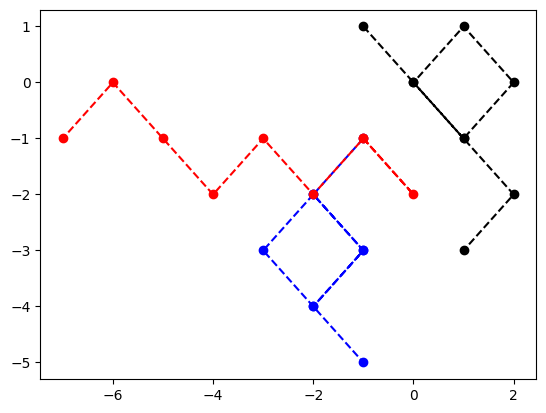

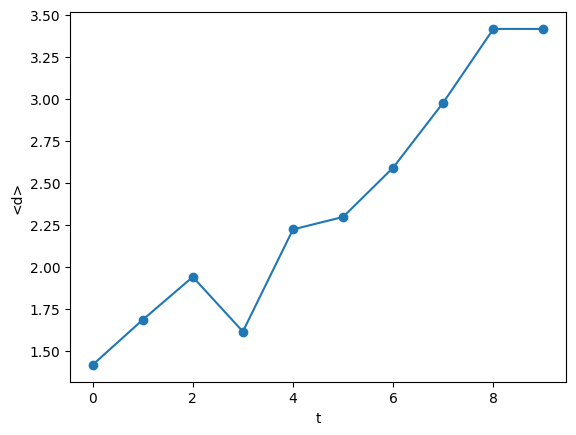

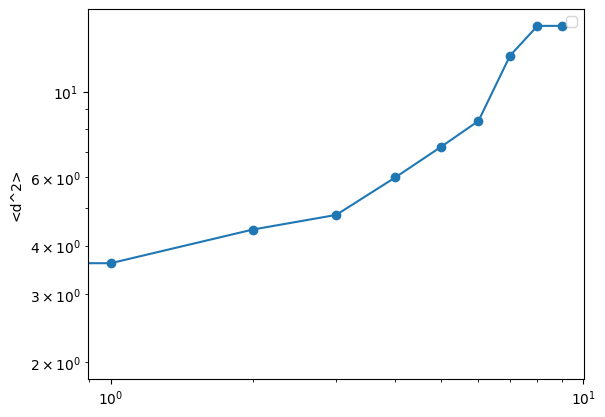

In [10]:
n_0 = 10   #number of initial walkers
n_steps = 10



pop_t = {t: [] for t in range(n_steps)}
pop_t[0] = [Walker(Position2D(0,0)) for i in range(n_0)]

step = 1

for t in range(1, n_steps):
    population = pop_t[t-1]
    
    for walker in population:
        
        x = random.choice([-1,1])
        y = random.choice([-1,1])
        
        v = step*np.array([x,y])
        
        displacement = Position2D(v[0],v[1])
        
        
        walker.position = walker.position + displacement
        pop_t[t].append(walker.copy())
    

x = {i: [] for i in range(3)}
y = {i: [] for i in range(3)}

cmap = {0:'blue', 1:'black', 2:'red'}

for t in range(n_steps):
    #plt.plot((0,0), markersize=20)
    for i in range(3):
        x[i].append(pop_t[t][i].position.x)
        y[i].append(pop_t[t][i].position.y)

        
plt.figure()        
for i in range(3):
    
    plt.plot(x[i][:t], y[i][:t], 'o--', c=cmap[i])

#Now see <d> and <d^2>
y = []
y_sq = []
for t in range(n_steps):
    aux = []
    for i in range(len(pop_t[t])):
        pos = pop_t[t][i].position
        aux.append(math.sqrt(pos.x**2 + pos.y**2))
    aux = np.array(aux)
    y.append(aux.mean())
    y_sq.append((aux**2).mean())
  

x = np.arange(0,n_steps)

plt.figure()
plt.plot(x, y, 'o-')
plt.ylabel('<d>')
plt.xlabel('t')

plt.figure()
plt.plot(x, y_sq, 'o-')
#plt.plot(x, x, label=f'y=0.5*s^2*t')
plt.legend(loc='best')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('<d^2>')

In [4]:
#Same model but with fitness for each

n_0 = 10**2 #Number of initial walkers
n_steps = 5*10**3   #maximum steps
N_max = 10**3  #maximum populatio size


f=3
#mu = 10
p=1.0


#Generate serial-time populations

pop_t = {t: [] for t in range(n_steps)}
pop_t[0] = [Walker(Position2D(0,0)) for i in range(n_0)]

N_grid = (2*n_steps)**2

position_fitness = np.array([0] * int(N_grid*(1-p)) + [f] *(N_grid - int(N_grid*(1-p))))
np.random.shuffle(position_fitness)
position_fitness = position_fitness.reshape((2*n_steps, 2*n_steps))

s = 1

for t in range(1, n_steps):
    
    print(f't={t}')
    population = pop_t[t-1]
    aux = []
    
    for walker in population:
                
        ftns = position_fitness[n_steps+walker.position.x][n_steps+walker.position.y]
        
       
        for m in range(ftns):

            step = s #+ np.random.poisson(s)
                      
            if position_fitness[n_steps+walker.position.x][n_steps+walker.position.y]:
                x = random.choice([-1,1])
                y = random.choice([-1,1])

                v = step*np.array([x,y])

                displacement = Position2D(v[0],v[1])
                w = Walker(Position2D(walker.position.x+v[0],walker.position.y+v[1]))
                #w.position = w.position + displacement
            aux.append(w.copy())
        

    if len(aux)>=N_max:
        aux.shuffle()
        pop_t[t] = aux[:N_max]
    elif p*f < 1:
        aux.shuffle()
        pop_t[t] = aux
        while len(pop_t[t])<N_max:
            pop_t[t].append(random.choice(aux))
    else:
        pop_t[t] = aux

t=1
t=2
t=3
t=4
t=5
t=6
t=7
t=8
t=9
t=10
t=11
t=12
t=13
t=14
t=15
t=16
t=17
t=18
t=19
t=20
t=21
t=22
t=23
t=24
t=25
t=26
t=27
t=28
t=29
t=30
t=31
t=32
t=33
t=34
t=35
t=36
t=37
t=38
t=39
t=40
t=41
t=42
t=43
t=44
t=45
t=46
t=47
t=48
t=49
t=50
t=51
t=52
t=53
t=54
t=55
t=56
t=57
t=58
t=59
t=60
t=61
t=62
t=63
t=64
t=65
t=66
t=67
t=68
t=69
t=70
t=71
t=72
t=73
t=74
t=75
t=76
t=77
t=78
t=79
t=80
t=81
t=82
t=83
t=84
t=85
t=86
t=87
t=88
t=89
t=90
t=91
t=92
t=93
t=94
t=95
t=96
t=97
t=98
t=99
t=100
t=101
t=102
t=103
t=104
t=105
t=106
t=107
t=108
t=109
t=110
t=111
t=112
t=113
t=114
t=115
t=116
t=117
t=118
t=119
t=120
t=121
t=122
t=123
t=124
t=125
t=126
t=127
t=128
t=129
t=130
t=131
t=132
t=133
t=134
t=135
t=136
t=137
t=138
t=139
t=140
t=141
t=142
t=143
t=144
t=145
t=146
t=147
t=148
t=149
t=150
t=151
t=152
t=153
t=154
t=155
t=156
t=157
t=158
t=159
t=160
t=161
t=162
t=163
t=164
t=165
t=166
t=167
t=168
t=169
t=170
t=171
t=172
t=173
t=174
t=175
t=176
t=177
t=178
t=179
t=180
t=181
t=182
t=183
t=184
t=18

t=1334
t=1335
t=1336
t=1337
t=1338
t=1339
t=1340
t=1341
t=1342
t=1343
t=1344
t=1345
t=1346
t=1347
t=1348
t=1349
t=1350
t=1351
t=1352
t=1353
t=1354
t=1355
t=1356
t=1357
t=1358
t=1359
t=1360
t=1361
t=1362
t=1363
t=1364
t=1365
t=1366
t=1367
t=1368
t=1369
t=1370
t=1371
t=1372
t=1373
t=1374
t=1375
t=1376
t=1377
t=1378
t=1379
t=1380
t=1381
t=1382
t=1383
t=1384
t=1385
t=1386
t=1387
t=1388
t=1389
t=1390
t=1391
t=1392
t=1393
t=1394
t=1395
t=1396
t=1397
t=1398
t=1399
t=1400
t=1401
t=1402
t=1403
t=1404
t=1405
t=1406
t=1407
t=1408
t=1409
t=1410
t=1411
t=1412
t=1413
t=1414
t=1415
t=1416
t=1417
t=1418
t=1419
t=1420
t=1421
t=1422
t=1423
t=1424
t=1425
t=1426
t=1427
t=1428
t=1429
t=1430
t=1431
t=1432
t=1433
t=1434
t=1435
t=1436
t=1437
t=1438
t=1439
t=1440
t=1441
t=1442
t=1443
t=1444
t=1445
t=1446
t=1447
t=1448
t=1449
t=1450
t=1451
t=1452
t=1453
t=1454
t=1455
t=1456
t=1457
t=1458
t=1459
t=1460
t=1461
t=1462
t=1463
t=1464
t=1465
t=1466
t=1467
t=1468
t=1469
t=1470
t=1471
t=1472
t=1473
t=1474
t=1475
t=1476

t=2511
t=2512
t=2513
t=2514
t=2515
t=2516
t=2517
t=2518
t=2519
t=2520
t=2521
t=2522
t=2523
t=2524
t=2525
t=2526
t=2527
t=2528
t=2529
t=2530
t=2531
t=2532
t=2533
t=2534
t=2535
t=2536
t=2537
t=2538
t=2539
t=2540
t=2541
t=2542
t=2543
t=2544
t=2545
t=2546
t=2547
t=2548
t=2549
t=2550
t=2551
t=2552
t=2553
t=2554
t=2555
t=2556
t=2557
t=2558
t=2559
t=2560
t=2561
t=2562
t=2563
t=2564
t=2565
t=2566
t=2567
t=2568
t=2569
t=2570
t=2571
t=2572
t=2573
t=2574
t=2575
t=2576
t=2577
t=2578
t=2579
t=2580
t=2581
t=2582
t=2583
t=2584
t=2585
t=2586
t=2587
t=2588
t=2589
t=2590
t=2591
t=2592
t=2593
t=2594
t=2595
t=2596
t=2597
t=2598
t=2599
t=2600
t=2601
t=2602
t=2603
t=2604
t=2605
t=2606
t=2607
t=2608
t=2609
t=2610
t=2611
t=2612
t=2613
t=2614
t=2615
t=2616
t=2617
t=2618
t=2619
t=2620
t=2621
t=2622
t=2623
t=2624
t=2625
t=2626
t=2627
t=2628
t=2629
t=2630
t=2631
t=2632
t=2633
t=2634
t=2635
t=2636
t=2637
t=2638
t=2639
t=2640
t=2641
t=2642
t=2643
t=2644
t=2645
t=2646
t=2647
t=2648
t=2649
t=2650
t=2651
t=2652
t=2653

KeyboardInterrupt: 

In [60]:
aux = [1,2,3,4,5,6,7,8,9]
if 1==1:
    if len(aux)>=N_max:
        random.shuffle(aux)
        pop_t[t] = aux[:N_max]
    elif p*f < 1:
        random.shuffle(aux)
        pop_t[t] = aux
        while len(pop_t[t])<N_max:
            pop_t[t].append(random.choice(aux))
    else:
        pop_t[t] = aux

1000

In [ ]:
print(np.count_nonzero(position_fitness)/N_grid)

plt.plot(n_steps, n_steps, '.', c='red', markersize=10)
plt.imshow(position_fitness)
plt.colorbar()
step_size = int(2*n_steps/10)
x_positions = np.arange(0,2*n_steps, step_size)
x_labels = np.arange(-n_steps, n_steps, step_size)
plt.xticks(x_positions, x_labels)
plt.yticks(x_positions, x_labels)
plt.show()

In [ ]:
for i in range(10,20):
    print(pop_t[2][random.randint(0,100)].position.y)

In [ ]:
#Select the trajectories
x = {i: [] for i in range(3)}
y = {i: [] for i in range(3)}

cmap = {0:'blue', 1:'black', 2:'red'}

for t in range(n_steps):
    #plt.plot((0,0), markersize=20)
    for i in range(3):
        x[i].append(pop_t[t][i].position.x)
        y[i].append(pop_t[t][i].position.y)

        
plt.figure()        
for i in range(3):
    plt.plot(x[i][:t], y[i][:t], 'o--', c=cmap[i])
plt.savefig(f'./Figures/Example1/png/paths_f_{f}.png', dpi=300, format='png')
plt.savefig(f'./Figures/Example1/svg/paths_f_{f}.svg', dpi=300, format='svg')

#Now compute <d> and <d^2>
y = []
y_st = []
y_sq = []
for t in range(n_steps):
    aux = []
    for i in range(len(pop_t[t])):
        pos = pop_t[t][i].position
        # aux = [(pos.x, pos.y), (pos.x, pos.y) ... ]
        aux.append(math.sqrt(pos.x**2 + pos.y**2))
    aux = np.array(aux)
    
    y.append(aux.mean())
    y_st.append(aux.std())
    y_sq.append((aux**2).mean())
  
greek_leeterz = [chr(code) for code in range(945,970)]
x = np.arange(0,n_steps)
y = np.array(y)
y_st = np.array(y_st)
y_sq = np.array(y_sq)

plt.figure()
b,w,E = calculateParametersLSR(np.log2(np.array(x[1:400])), np.log2(np.array(y[1:400])))
x_aster = np.array(x)
y_aster = 2**b *x**w
plt.plot(x_aster,y_aster, '--', label=f'{greek_leeterz[0]}:{round(w,3)}+-{round(E,3)}')
b,w,E = calculateParametersLSR(np.log2(np.array(x[600:])), np.log2(np.array(y[600:])))
x_aster = np.array(x)
y_aster = 2**b *x**w
plt.plot(x_aster,y_aster, '--', label=f'{greek_leeterz[0]}:{round(w,3)}+-{round(E,3)}')
plt.plot(x, y, 'o-')
plt.ylabel('<d>')
plt.xlabel('t')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.savefig(f'./Figures/Example1/png/d_mean_f_{f}.png', dpi=300, format='png')
plt.savefig(f'./Figures/Example1/svg/d_mean_f_{f}.svg', dpi=300, format='svg')


plt.figure()
plt.plot(x[2:], (y_st**2 / y)[2:], 'o-', label='Simulation')
plt.plot(x[2:], np.array([1 for i in x])[2:], '--', c='black', label='Poisson disperssion')
plt.ylabel('Disperssion index')
plt.legend(loc='best')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('t')
plt.savefig(f'./Figures/Example1/png/disperssion_index_f_{f}.png', dpi=300, format='png')
plt.savefig(f'./Figures/Example1/svg/disperssion_index_f_{f}.svg', dpi=300, format='svg')

plt.figure()
plt.plot(x, y_sq, 'o-')
b,w,E = calculateParametersLSR(np.log2(np.array(x[1:400])), np.log2(np.array(y_sq[1:400])))
x_aster = np.array(x)
y_aster = 2**b *x**w
plt.plot(x_aster,y_aster, '--', label=f'{greek_leeterz[0]}:{round(w,3)}+-{round(E,3)}')

b,w,E = calculateParametersLSR(np.log2(np.array(x[600:])), np.log2(np.array(y_sq[600:])))
x_aster = np.array(x)
y_aster = 2**b *x**w
plt.plot(x_aster,y_aster, '--', label=f'{greek_leeterz[0]}:{round(w,3)}+-{round(E,3)}')
#plt.plot(x, mu**2*x, label=f'y=0.5*s^2*t')
plt.legend(loc='best')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.ylabel('<d^2>')
plt.xlabel('t')
plt.savefig(f'./Figures/Example1/png/d2_mean_{f}.png', dpi=300, format='png')
plt.savefig(f'./Figures/Example1/svg/d2_mean_f_{f}.svg', dpi=300, format='svg')

In [105]:
#Simulation for alpha as a function of different values of f and p
#Same model but with fitness for each

n_0 = 10**2 #Number of initial walkers
n_steps = 10**3   #maximum steps
N_max = 10**3  #maximum populatio size
alpha_results = {}

n_iters = 20

p=0.75

for f in [1,2,3,4]:
    alpha_results[f] = []
    for i in range(n_iters):
        print(f'f={f} , iteration {i+1}')
        #Generate serial-time populations

        pop_t = {t: [] for t in range(n_steps)}
        pop_t[0] = [Walker(Position2D(0,0)) for i in range(n_0)]

        N_grid = (2*n_steps)**2

        position_fitness = np.array([0] * int(N_grid*(1-p)) + [f] *(N_grid - int(N_grid*(1-p))))
        np.random.shuffle(position_fitness)
        position_fitness = position_fitness.reshape((2*n_steps, 2*n_steps))

        s = 1

        for t in range(1, n_steps):

            #print(f't={t}')
            population = pop_t[t-1]
            aux = []

            for walker in population:

                ftns = position_fitness[n_steps+walker.position.x][n_steps+walker.position.y]


                for m in range(ftns):

                    step = s #+ np.random.poisson(s)

                    if position_fitness[n_steps+walker.position.x][n_steps+walker.position.y]:
                        x = random.choice([-1,1])
                        y = random.choice([-1,1])

                        v = step*np.array([x,y])

                        displacement = Position2D(v[0],v[1])
                        w = Walker(Position2D(walker.position.x+v[0],walker.position.y+v[1]))
                        #w.position = w.position + displacement
                    aux.append(w.copy())


            if len(aux)==0:
                print('No population')
                break
            if len(aux)>=N_max:
                random.shuffle(aux)
                pop_t[t] = aux[:N_max]
            elif p*f < 1:
                random.shuffle(aux)
                pop_t[t] = aux
                i=0
                while len(pop_t[t])<N_max:
                    pop_t[t].append(aux[i])
                    i+=1
            else:
                pop_t[t] = aux
        y = []
        y_st = []
        y_sq = []
        for t in range(n_steps):
            aux = []
            for i in range(len(pop_t[t])):
                pos = pop_t[t][i].position
                # aux = [(pos.x, pos.y), (pos.x, pos.y) ... ]
                aux.append(math.sqrt(pos.x**2 + pos.y**2))
            aux = np.array(aux)

            y.append(aux.mean())
            y_st.append(aux.std())
            y_sq.append((aux**2).mean())

        greek_leeterz = [chr(code) for code in range(945,970)]
        x = np.arange(0,n_steps)
        y = np.array(y)
        y_st = np.array(y_st)
        y_sq = np.array(y_sq)
        b,w,E = calculateParametersLSR(np.log2(np.array(x[1:])), np.log2(np.array(y_sq[1:])))
        alpha_results[f].append((w,E))


f=1 , iteration 1
f=1 , iteration 2
f=1 , iteration 3
No population
f=1 , iteration 4


/tmp/ipykernel_6590/2247515027.py:83: RuntimeWarning: Mean of empty slice.
  y.append(aux.mean())
/tmp/ipykernel_6590/2247515027.py:85: RuntimeWarning: Mean of empty slice.
  y_sq.append((aux**2).mean())


No population
f=1 , iteration 5
f=1 , iteration 6
f=1 , iteration 7
f=1 , iteration 8
f=1 , iteration 9
f=1 , iteration 10
f=1 , iteration 11
No population
f=1 , iteration 12
f=1 , iteration 13
f=1 , iteration 14
No population
f=1 , iteration 15
No population
f=1 , iteration 16
f=1 , iteration 17
f=1 , iteration 18
No population
f=1 , iteration 19
f=1 , iteration 20
No population
f=2 , iteration 1
f=2 , iteration 2
No population
f=2 , iteration 3


KeyboardInterrupt: 

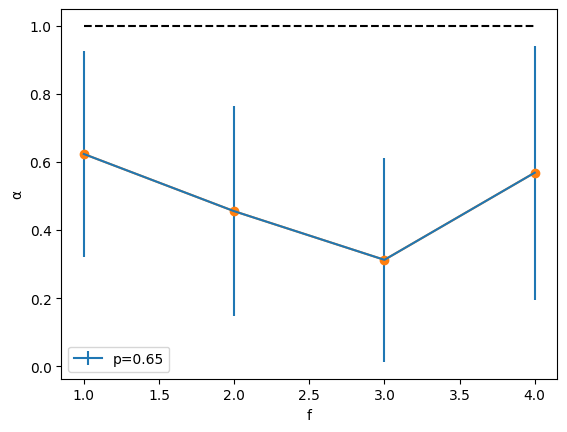

In [102]:
a = []
a_err = []
x = []
for f in alpha_results.keys():
    x.append(f)
    a.append(np.array([alpha_results[f][i][0] for i in range(len(alpha_results[f])) if not np.isnan(alpha_results[f][i][0])]).mean())
    a_err.append(np.array([alpha_results[f][i][0] for i in range(len(alpha_results[f])) if not np.isnan(alpha_results[f][i][0])]).std())

a = np.array(a)
a_err = np.array(a_err)
plt.errorbar(x,a, a_err, label=f'p={p}')
plt.plot(x,a, 'o-')
plt.plot(x, [1 for i in x], '--', c='black')
plt.ylabel(f'{greek_leeterz[0]}')
plt.xlabel('f')
plt.legend(loc='best')

pondered error for p=0.65 is 0.4820506678015318


Text(0.5, 0, 'p')

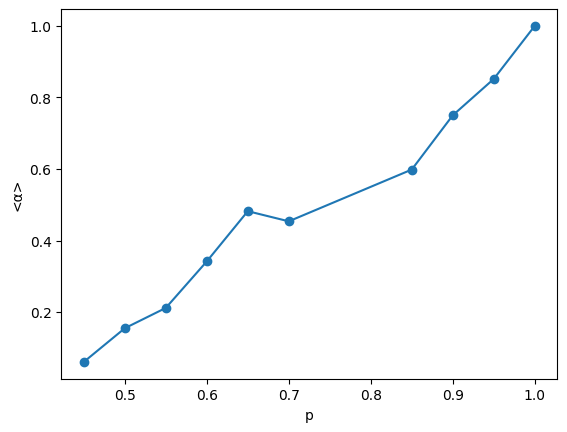

In [104]:
print( f'pondered error for p={p} is' , (a/a_err**2).mean()/(1/a_err**2).mean())
x = [1.0, 0.95, 0.9, 0.85, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45]
y = [1.0, 0.8517, 0.75, 0.5984, 0.4537, 0.48205, 0.3417, 0.21158, 0.15479, 0.0606]
plt.plot(x, y, 'o-')
plt.ylabel(f'<{greek_leeterz[0]}>')
plt.xlabel('p')

Text(0.5, 0, 'd^2')

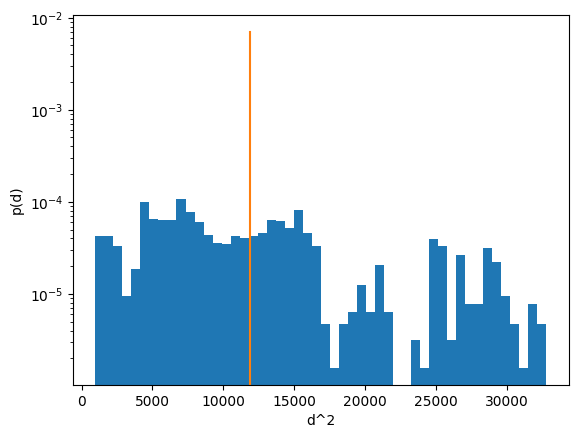

In [345]:
plt.hist(aux**2, bins=50, density=True)
plt.plot([(aux**2).mean() for i in range(20)], np.linspace(0,0.007, 20))
plt.yscale('log')
plt.ylabel('p(d)')
plt.xlabel('d^2')

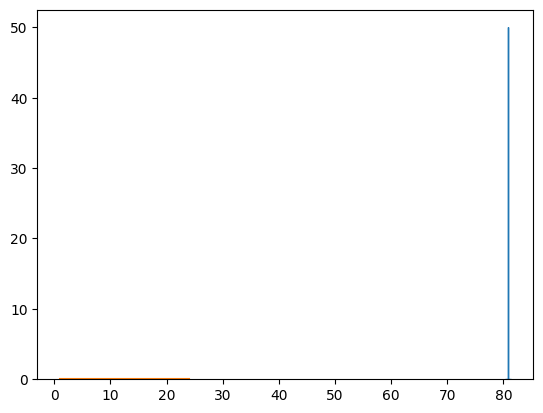

In [226]:
plt.hist(aux, bins=50, density=True, histtype='step')
m = aux.mean()
x = np.arange(1,25)
y = np.e**(-1.0*m)*m**(x)/np.array([np.math.factorial(int(i)) for i in x])
plt.plot(x, y)
#y=plt.hist(aux, bins=50, density=True)[0]
#x = plt.hist(aux, bins=50)[1]
#plt.figure()
#plt.plot(x[1:]**2,y)
#plt.yscale('log')
plt.plot([aux.mean() for t in range(20)], np.linspace(0,0.1, 20))
plt.plot([aux.mean() - aux.std()  for t in range(20)], np.linspace(0,0.1, 20), '--')
plt.plot([aux.mean() + aux.std() for t in range(20)], np.linspace(0,0.1, 20), '--')
#plt.yscale('log')
#plt.xscale('log')

In [500]:
n_steps = 5*10**3
n_points = 20
base = 10


t= np.logspace(0,np.log10(n_steps), num=n_points, base=base, dtype=int)

t = np.unique(t)
x = np.random.randint(0,100,n_steps)

[20 82 12 ... 14 10 26]
[82 12 86 93 77 49 81 44 10 59 23 99 44 94 57 33 16  0 26]


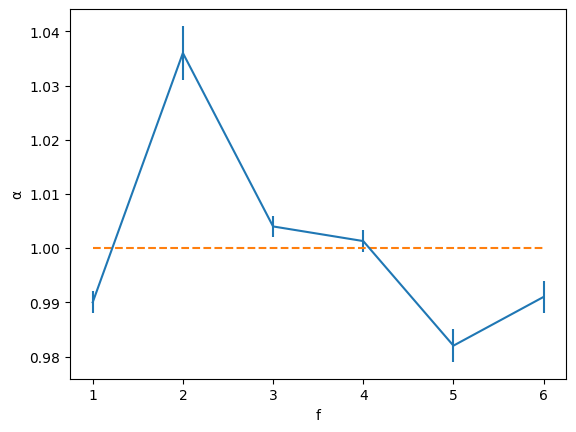

In [191]:
plt.figure()

a = [1,2,3,4, 5, 6]
b = [0.99, 1.036, 1.004, 1.0013, 0.982, 0.991]
c = [0.002, 0.005, 0.002, 0.002, 0.003, 0.003]

plt.errorbar(a,b,c)
plt.plot(a, [1.0 for i in range(len(a))], '--')

plt.ylabel(f'{greek_leeterz[0]}')
plt.xlabel(f'f')
plt.savefig(f'Figures/Example1/png/alpha_f.png', dpi=300, format='png')
plt.savefig(f'Figures/Example1/svg/alpha_f.svg', dpi=300, format='svg')

In [ ]:
#Given a list, compute abundances of its elements
#Normalize those abundances
#Now multiply by N_max, and do (int), except for the last element, which will contain N_max-sum(N_all the others)
#Now put that as a list and return it

In [475]:
#Same model but with fitness for each

n_0 = 1 #Number of initial walkers
n_steps = 10   #maximum steps
N_max = 10**2  #maximum populatio size


f=1
#mu = 10
p=0.9

pop_t = {t: [] for t in range(n_steps)}
pop_t[0] = [Walker(Position2D(0,0)) for i in range(n_0)]


#plt.rcParams["figure.autolayout"] = True
#plt.imshow(position_fitness)
s = 1

N_grid = (2*n_steps)**2

position_fitness = np.array([0] * int(N_grid*(1-p)) + [f] *(N_grid - int(N_grid*(1-p))))
np.random.shuffle(position_fitness)
position_fitness = position_fitness.reshape((2*n_steps, 2*n_steps))
position_fitness[n_steps][n_steps] = f

t=1
t=2
t=3
t=4
t=5
t=6
t=7
t=8
t=9


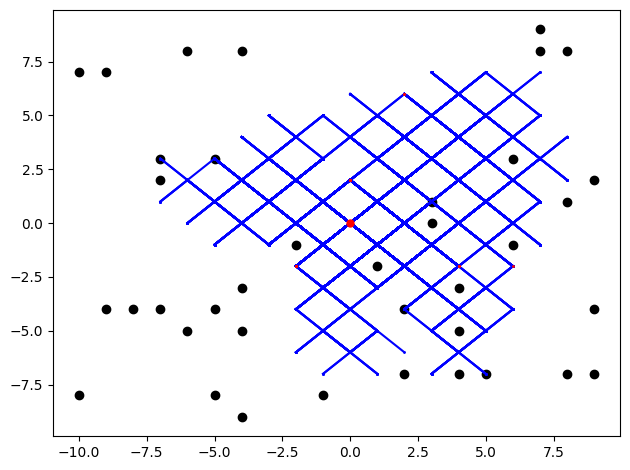

In [477]:
f = 10

position_fitness_here = position_fitness*f

for t in range(1, n_steps):
    #plt.figure()
    #plt.xlim(-2*math.sqrt(n_steps),2*math.sqrt(n_steps))
    #plt.ylim(-2*math.sqrt(n_steps),2*math.sqrt(n_steps))
    #plt.imshow(position_fitness)
    #step_size = 1
    #x_positions = np.arange(0,2*n_steps, step_size)
    #x_labels = np.arange(-n_steps, n_steps, step_size)
    #plt.xticks(x_positions, x_labels)
    #plt.yticks(x_positions, x_labels)
    
    print(f't={t}')
    population = pop_t[t-1]
    aux = []
    
    for walker in population:
        
        plt.plot(walker.position.x, walker.position.y, 'o', markersize=1,  c='red')
        ftns = position_fitness_here[walker.position.x][walker.position.y]
        
       
        for m in range(ftns):

            step = s #+ np.random.poisson(s)
                      
            if position_fitness_here[n_steps+walker.position.x][n_steps+walker.position.y]:
                x = random.choice([-1,1])
                y = random.choice([-1,1])

                v = step*np.array([x,y])

                displacement = Position2D(v[0],v[1])
                w = Walker(Position2D(walker.position.x+v[0],walker.position.y+v[1]))
                plt.plot([walker.position.x, w.position.x], [walker.position.y, w.position.y], 'o-',markersize=1, markerfacecolor='none', c='blue')
                #w.position = w.position + displacement
            aux.append(w.copy())
        

    if len(aux)>=N_max:
        pop_t[t] = random.choices(aux, k=N_max)
    elif p*f < 1:
        pop_t[t] = random.choices(aux, k=N_max)
    else:
        pop_t[t] = aux
    #plt.show()
    
black_points_x = []
black_points_y = []
for i in range(2*n_steps):
    for j in range(2*n_steps):
        if not position_fitness[i][j]:
            #print('positive fitness')
            black_points_x.append(i-n_steps)
            black_points_y.append(j-n_steps)
plt.scatter(black_points_x, black_points_y, c='black')

plt.plot(0,0, 'o',markersize=5, c='red')

#plt.xlim(-2*math.sqrt(n_steps),2*math.sqrt(n_steps))
#plt.ylim(-2*math.sqrt(n_steps),2*math.sqrt(n_steps))